<a href="https://colab.research.google.com/github/snehilms/MachineLearning-DataScience_Projects/blob/main/CNN_and_Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The limitations of ANN are that they have a lot of parameters so they usually overfit the data. Another limitation is that it fails to recoginize translation variance, rotational variance and sheer variance. 

In [ ]:
!wget https://www.dropbox.com/s/is1selxrljlls70/Dataset.zip?dl=0

--2021-05-20 10:12:57--  https://www.dropbox.com/s/is1selxrljlls70/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/is1selxrljlls70/Dataset.zip [following]
--2021-05-20 10:12:58--  https://www.dropbox.com/s/raw/is1selxrljlls70/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbeed964d7e9bda6f1c6ec69456.dl.dropboxusercontent.com/cd/0/inline/BO1Jl1wRmDvUnUZ5oa4o2NP9nbeCfjEWFMEC-upJdzF8ooYti7uJKiHYe4p_yJPDJSv_9PWBlZx6G87pNxUOnUvJthVXF6wX1Odu_mF3tZjBkm2xNpXDibYzr6vvfGYNEMd9LhZJy6juPlyLxwAUURpn/file# [following]
--2021-05-20 10:12:58--  https://ucbeed964d7e9bda6f1c6ec69456.dl.dropboxusercontent.com/cd/0/inline/BO1Jl1wRmDvUnUZ5oa4o2NP9nbeCfjEWFMEC-upJdzF8ooYti7uJKiHYe4p_yJPDJSv_9PWBlZx6G87pNxUOnUvJ

In [ ]:
!unzip Dataset.zip\?dl\=0

Archive:  Dataset.zip?dl=0
   creating: Dataset/Test/
   creating: Dataset/Test/Parasite/
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_17.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png  
 extracting: Dataset

#Malaria Detection


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,Model
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import EarlyStopping

In [ ]:
#Load the Data 
train_data='/content/Dataset/Train'
test_data='/content/Dataset/Test'

#Loading the parasitic and uninfected images from training set
parasitic_images_train=os.listdir('/content/Dataset/Train/Parasite')
uninfected_images_train=os.listdir('/content/Dataset/Train/Uninfected')

#Loading the parasitic and uninfected images from testing set
parasitic_images_testing=os.listdir('/content/Dataset/Test/Parasite')
uninfected_images_testing=os.listdir('/content/Dataset/Test/Uninfected')

In [ ]:
len(parasitic_images_train)

220

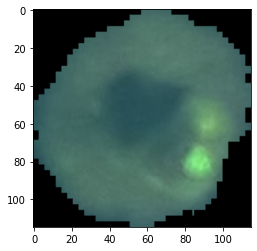

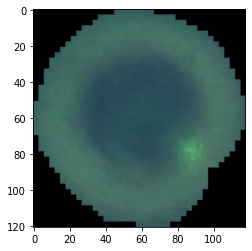

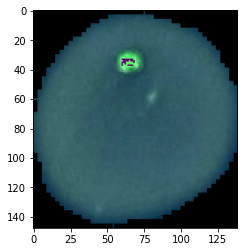

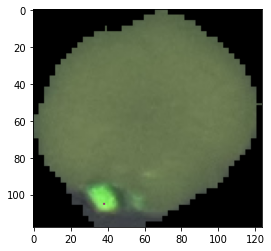

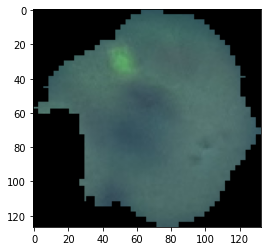

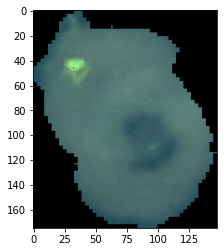

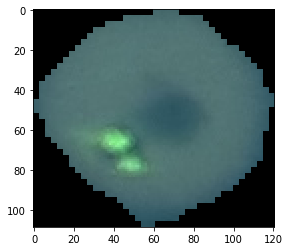

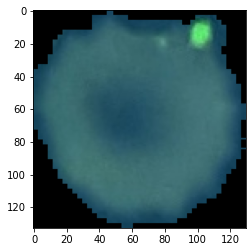

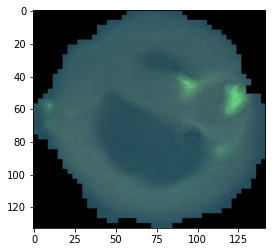

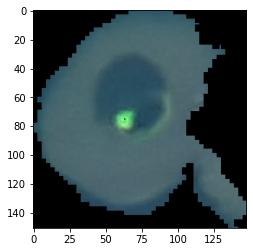

In [ ]:
def load_images(image_folder,dataset='Train',class_='Parasite'):
  path='/content/Dataset'+'/'+dataset+'/'+class_
  # Here we are trying to load the first 10 images
  for i in range(10):
    imgpath=os.path.join(path,image_folder[i])
    img=image.load_img(imgpath)
    img_arr=image.img_to_array(img)
    plt.imshow((img_arr*255).astype(np.uint8))
    plt.show()
load_images(parasitic_images_train)

In [ ]:
#Creating a ImageDataGenerator
train_generator=ImageDataGenerator(rescale=1.0/255,rotation_range=10,width_shift_range=1.0,height_shift_range=1.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
#Preparing the Training Data
training_data=train_generator.flow_from_directory(train_data,target_size=(224,224),class_mode='categorical')
#Testing Generator 
test_generator=ImageDataGenerator(rescale=1.0/255)
testing_data=test_generator.flow_from_directory(test_data,target_size=(224,224),class_mode='categorical')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


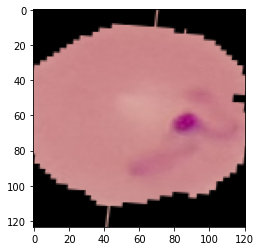

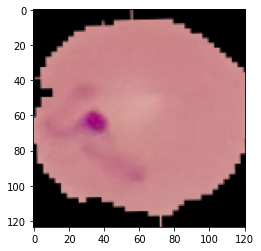

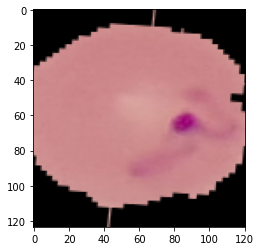

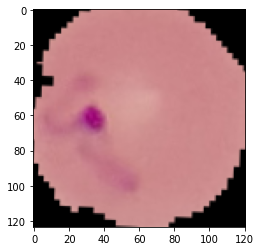

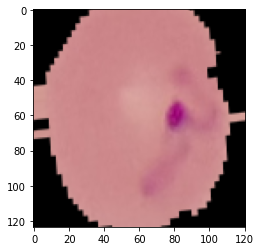

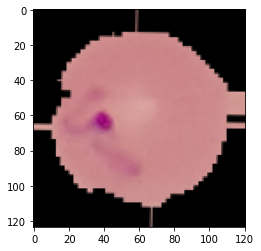

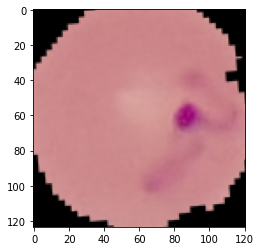

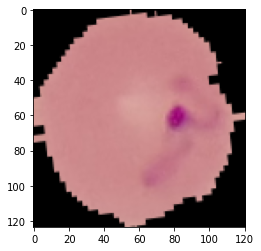

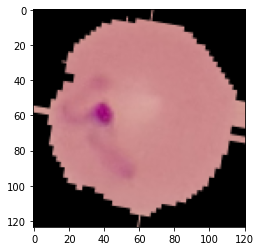

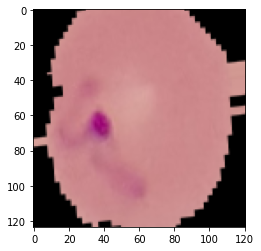

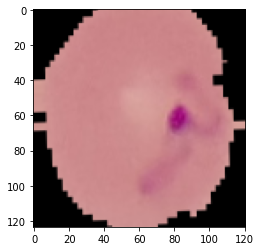

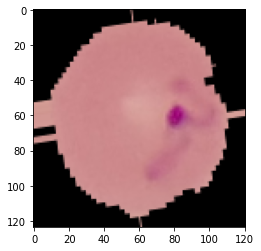

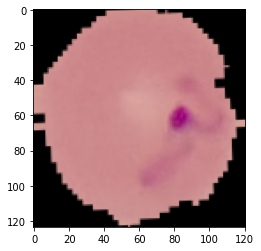

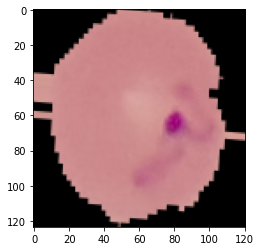

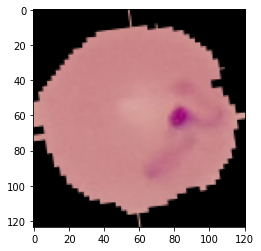

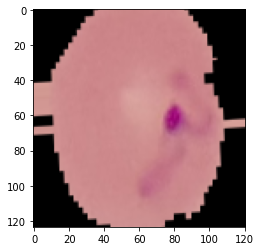

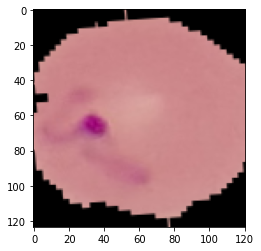

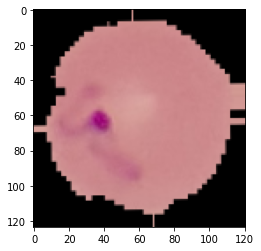

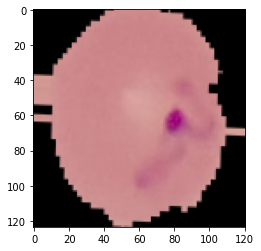

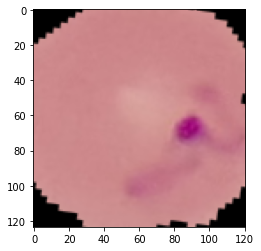

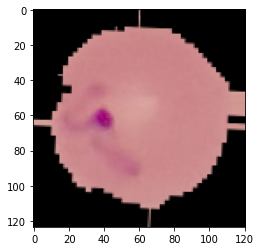

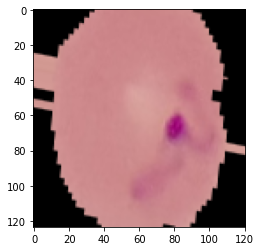

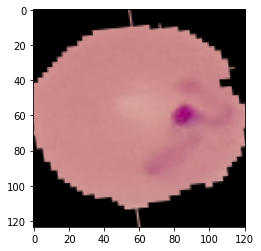

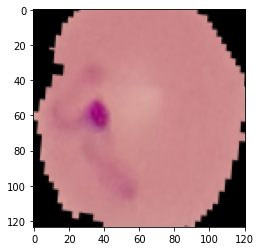

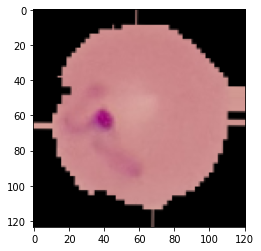

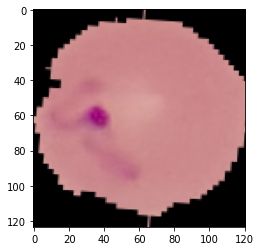

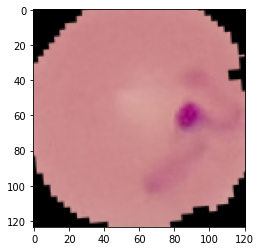

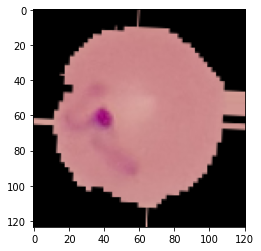

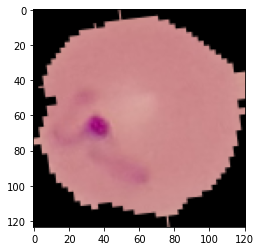

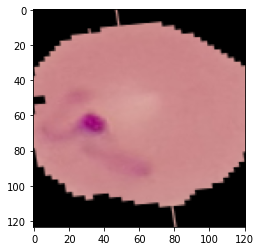

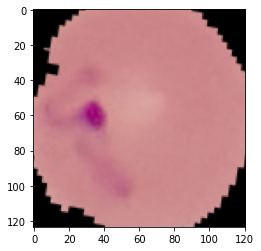

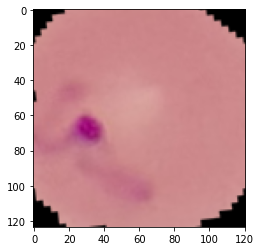

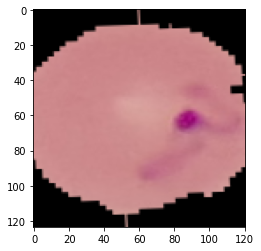

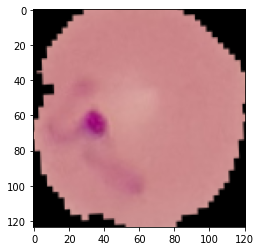

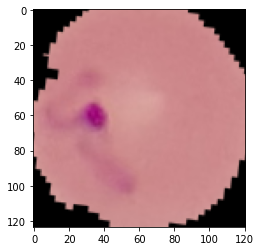

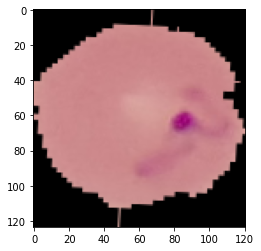

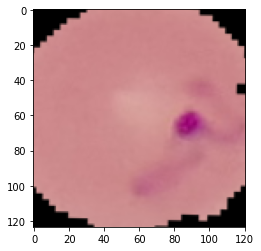

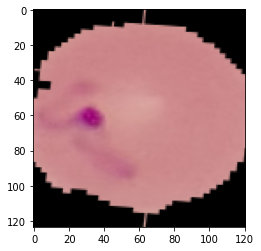

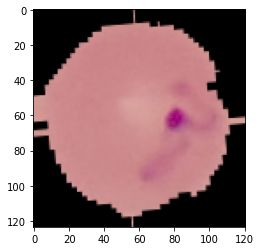

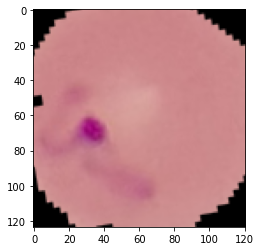

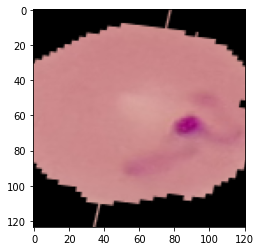

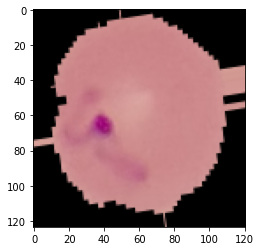

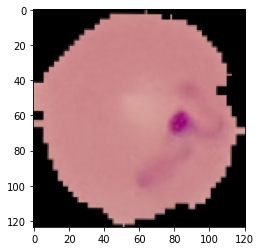

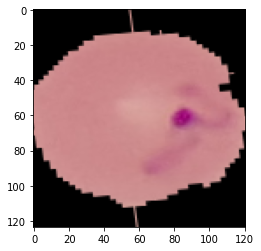

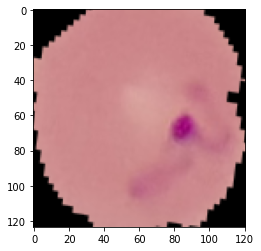

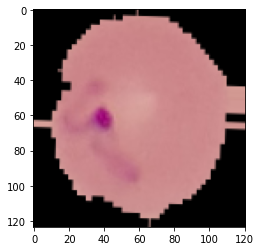

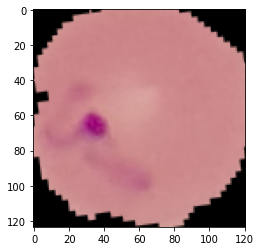

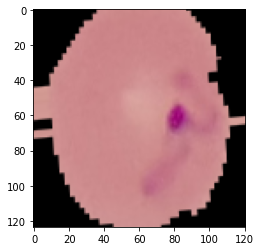

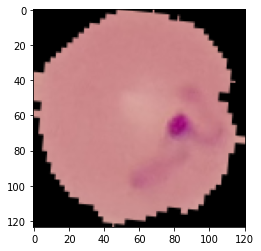

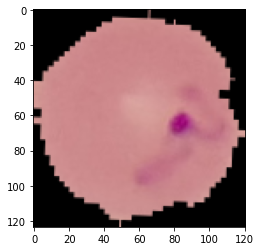

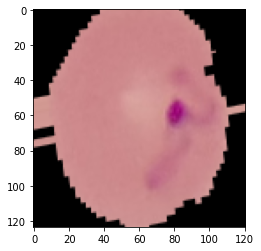

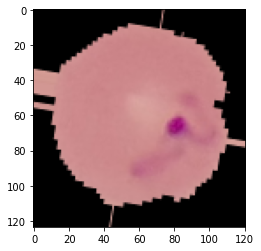

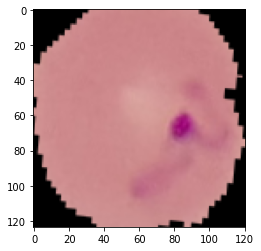

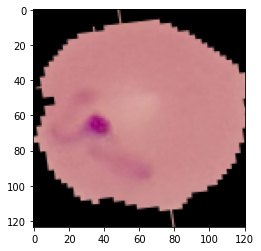

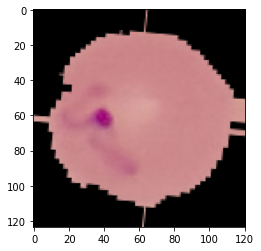

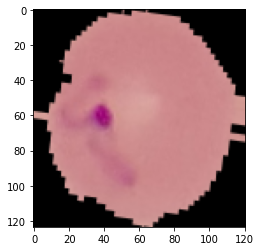

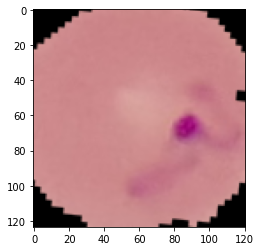

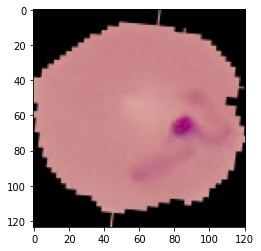

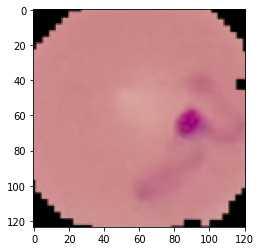

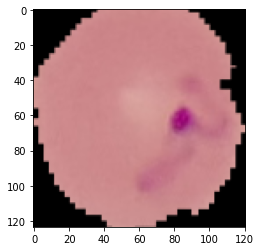

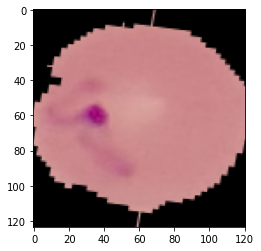

KeyboardInterrupt: ignored

In [ ]:
img1=image.load_img('/content/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_111.png')
img1_arr=image.img_to_array(img1)
test=train_generator.flow(img1_arr.reshape((1,*img1_arr.shape)))
for img in test:
  plt.imshow(img[0])
  plt.show()

#Using Transfer Learning for Model Building

In [ ]:
from keras.applications import vgg19

#Building the model
model=vgg19.VGG19(include_top=False,input_shape=(224,224,3))
model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for i in range(len(model.layers)):
  print(i,model.layers[i])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7faa92432550>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa91d5dd50>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa91e28e10>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faa9242ce50>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa921f2ed0>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa921e7d90>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faa921cfe10>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa921ecc90>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa921d7f90>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa921d7350>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faa92202a50>
11 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faa91f84750>
12 <tensorflow.python.ke

In [ ]:
#Completing the Custom modeling to learn the advanced features
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(2,activation='softmax')(d1)

#Building the custom Resnt50 model
model_new =Model(inputs=model.input,outputs=fc2)

#compile the new model
model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
for i in range(len(model.layers)):
  model.layers[i].trainable =False
model_new.summary()

#Compile the model Again
model_new.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
callback=EarlyStopping(patience=10)
hist=model_new.fit_generator(training_data,steps_per_epoch=416/32,validation_data=testing_data,epochs=100)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
13/13 [==============================] - 45s 573ms/step - loss: 0.7559 - accuracy: 0.5611 - val_loss: 0.6567 - val_accuracy: 0.8209
Epoch 2/100
13/13 [==============================] - 6s 426ms/step - loss: 0.7676 - accuracy: 0.5006 - val_loss: 0.7009 - val_accuracy: 0.3881
Epoch 3/100
13/13 [==============================] - 6s 430ms/step - loss: 0.7342 - accuracy: 0.5322 - val_loss: 0.6955 - val_accuracy: 0.4403
Epoch 4/100
13/13 [==============================] - 6s 432ms/step - loss: 0.6489 - accuracy: 0.6340 - val_loss: 0.6135 - val_accuracy: 0.7164
Epoch 5/100
13/13 [==============================] - 6s 434ms/step - loss: 0.6382 - accuracy: 0.6512 - val_loss: 0.5939 - val_accuracy: 0.6791
Epoch 6/100
13/13 [==============================] - 6s 437ms/step - loss: 0.6133 - accuracy: 0.6330 - val_loss: 0.5964 - val_accuracy: 0.6940
Epoch 7/100
13/13 [==============================] - 6s 429ms/step - loss: 0.6014 - accuracy: 0.7095 - val_loss: 0.5898 - val_accuracy: 0.761

In [ ]:
h=hist1.history
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.legend()
plt.show()